In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
ds = xr.open_dataset('noaav4_nh_monthly_sic_1978_2024.nc')
ds

<xarray.Dataset> Size: 2GB
Dimensions:                                 (time: 545, tdim: 1, y: 448, x: 304)
Coordinates:
  * time                                    (time) datetime64[ns] 4kB 1978-11...
    xgrid                                   (x) float32 1kB ...
    ygrid                                   (y) float32 2kB ...
Dimensions without coordinates: tdim, y, x
Data variables:
    cdr_seaice_conc_monthly                 (time, tdim, y, x) float32 297MB ...
    melt_onset_day_cdr_seaice_conc_monthly  (time, tdim, y, x) float32 297MB ...
    nsidc_bt_seaice_conc_monthly            (time, tdim, y, x) float32 297MB ...
    nsidc_nt_seaice_conc_monthly            (time, tdim, y, x) float32 297MB ...
    projection                              (time) |S1 545B ...
    qa_of_cdr_seaice_conc_monthly           (time, tdim, y, x) float32 297MB ...
    stdev_of_cdr_seaice_conc_monthly        (time, tdim, y, x) float32 297MB ...
Attributes: (12/41)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc_monthly
    metadata_link:             https://nsidc.org/data/g02202/versions/4/
    ...                        ...
    platform:                  NIMBUS-7
    sensor:                    SMMR > Scanning Multichannel Microwave Radiometer
    date_created:              2021-06-22T16:08:07Z
    time_coverage_start:       1987-04-01T00:00:00Z
    time_coverage_end:         1987-04-30T23:59:59Z
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...

In [4]:
sic = ds['cdr_seaice_conc_monthly'][:, 0].mean(dim='time')
sic.shape

(448, 304)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


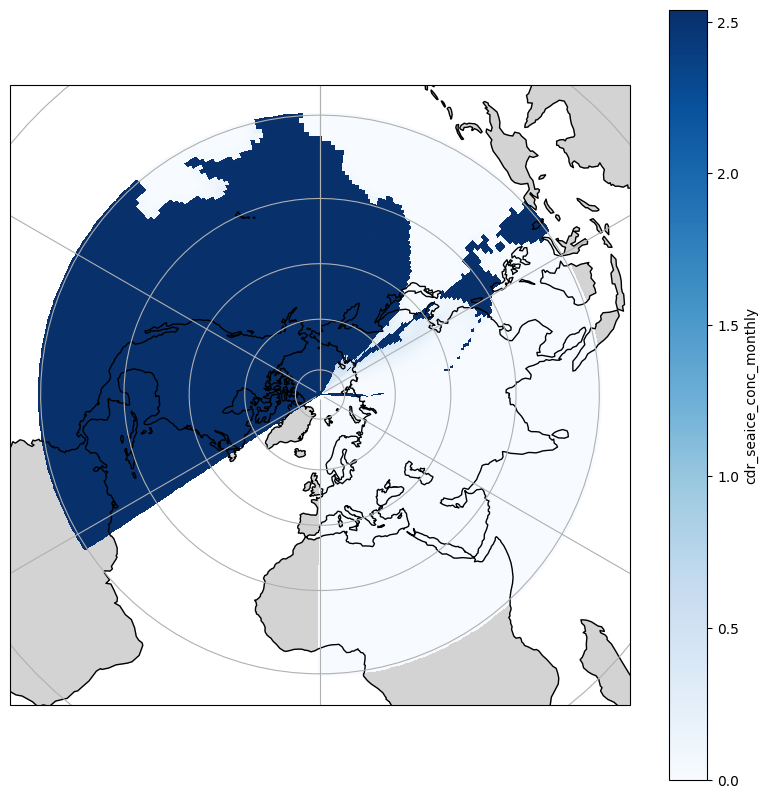

In [6]:
# Plot sic with the land grey, sea ice cmap, coastlines, gridlines, and origin='upper'
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
# ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='lightgrey')

# Use pcolormesh to plot the data
sic.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=True)

ax.coastlines()
ax.gridlines()
plt.show()